In [1]:
# Day 84 - Time Series Basics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a simple time series dataset (daily data)
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
np.random.seed(42)
temperature = 20 + np.sin(np.linspace(0, 3 * np.pi, len(date_rng))) * 10 + np.random.normal(0, 2, len(date_rng))

df = pd.DataFrame({'Date': date_rng, 'Temperature': temperature})
df.set_index('Date', inplace=True)

In [2]:
# Display first few rows
print(df.head())

# ----------------- Basic Exploration -----------------
print("\nData Summary:")
print(df.describe())

            Temperature
Date                   
2022-01-01    20.993428
2022-01-02    19.982365
2022-01-03    21.812991
2022-01-04    23.822046
2022-01-05    20.565533

Data Summary:
       Temperature
count   365.000000
mean     22.136027
std       6.911012
min       7.134106
25%      15.945882
50%      23.432954
75%      28.304788
max      33.039094


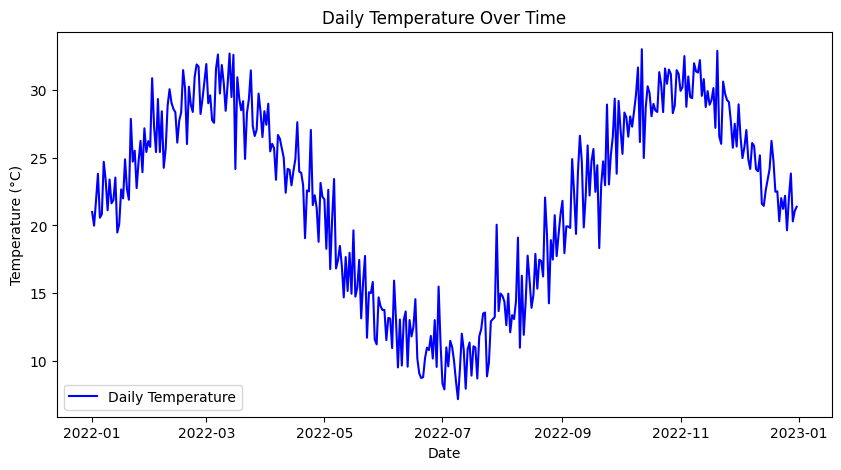

In [3]:
# ----------------- Visualization -----------------
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Temperature'], label='Daily Temperature', color='blue')
plt.title('Daily Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

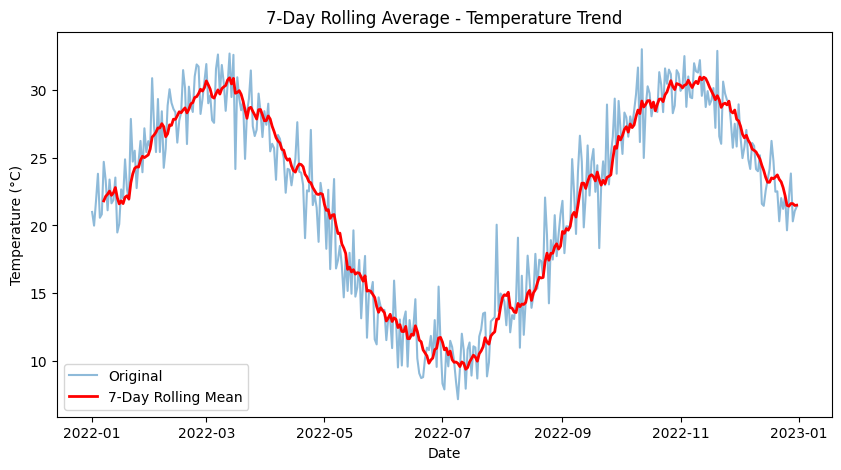

In [4]:

# ----------------- Rolling Mean (Moving Average) -----------------
df['Rolling_Mean_7'] = df['Temperature'].rolling(window=7).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['Temperature'], label='Original', alpha=0.5)
plt.plot(df['Rolling_Mean_7'], label='7-Day Rolling Mean', color='red', linewidth=2)
plt.title('7-Day Rolling Average - Temperature Trend')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

C:\Users\amank\AppData\Local\Temp\ipykernel_2196\708667653.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Temperature'].resample('M').mean()



Monthly Average Temperature:
Date
2022-01-31    23.283216
2022-02-28    28.651756
2022-03-31    29.247532
2022-04-30    24.076108
2022-05-31    16.459333
Freq: ME, Name: Temperature, dtype: float64


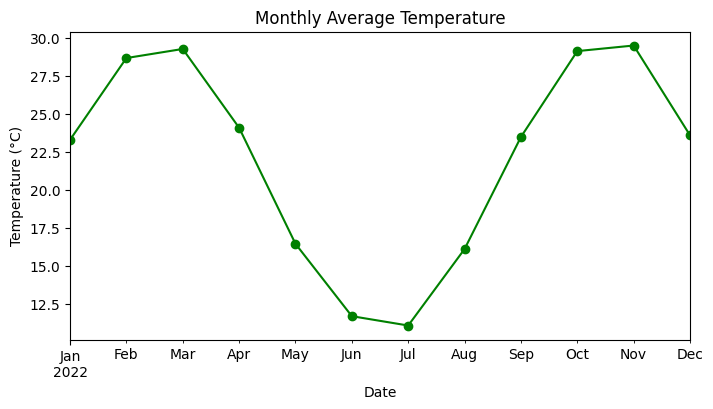

In [5]:
# ----------------- Resampling -----------------
# Convert daily data to monthly mean
monthly_avg = df['Temperature'].resample('M').mean()
print("\nMonthly Average Temperature:")
print(monthly_avg.head())

plt.figure(figsize=(8, 4))
monthly_avg.plot(marker='o', color='green')
plt.title('Monthly Average Temperature')
plt.ylabel('Temperature (°C)')
plt.show()